**Group 2 **
<br>
Darren Oh - 7683996
<br>
Sarah Loh Pei Ling - 7683560
<br>
Le Minh Vu - 7558909
<br>
Benjamin Lim Yi He - 5628866
<br>
Chow Jun Hao - 7684009
<br>
Gavin Tan Jun Yin - 7573935


**Get and load the Data**


In [ ]:
import pandas as pd


In [ ]:
def load_UNSW_NB15_data():

  train_path = "/content/UNSW_NB15_training-set.csv"
  test_path = "/content/UNSW_NB15_testing-set.csv"

  return pd.read_csv(train_path), pd.read_csv(test_path)

In [ ]:
train_set, test_set = load_UNSW_NB15_data()

**Take a Quick Look at the Data Structure**

In [ ]:
train_set.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 45 columns]

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
train_set["label"].value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [ ]:
train_set["attack_cat"].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [ ]:
train_set.describe()

id           dur         spkts         dpkts        sbytes  \
count  82332.000000  82332.000000  82332.000000  82332.000000  8.233200e+04   
mean   41166.500000      1.006756     18.666472     17.545936  7.993908e+03   
std    23767.345519      4.710444    133.916353    115.574086  1.716423e+05   
min        1.000000      0.000000      1.000000      0.000000  2.400000e+01   
25%    20583.750000      0.000008      2.000000      0.000000  1.140000e+02   
50%    41166.500000      0.014138      6.000000      2.000000  5.340000e+02   
75%    61749.250000      0.719360     12.000000     10.000000  1.280000e+03   
max    82332.000000     59.999989  10646.000000  11018.000000  1.435577e+07   

             dbytes          rate          sttl          dttl         sload  \
count  8.233200e+04  8.233200e+04  82332.000000  82332.000000  8.233200e+04   
mean   1.323379e+04  8.241089e+04    180.967667     95.713003  6.454902e+07   
std    1.514715e+05  1.486204e+05    101.513358    116.667722  1.798618e+08   
min    0.000000e+00  0.000000e+00      0.000000      0.000000  0.000000e+00   
25%    0.000000e+00  2.860611e+01     62.000000      0.000000  1.120247e+04   
50%    1.780000e+02  2.650177e+03    254.000000     29.000000  5.770032e+05   
75%    9.560000e+02  1.111111e+05    254.000000    252.000000  6.514286e+07   
max    1.465753e+07  1.000000e+06    255.000000    253.000000  5.268000e+09   

       ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
count  ...      82332.000000      82332.000000    82332.000000  82332.000000   
mean   ...          4.928898          3.663011        7.456360      0.008284   
std    ...          8.389545          5.915386       11.415191      0.091171   
min    ...          1.000000          1.000000        1.000000      0.000000   
25%    ...          1.000000          1.000000        1.000000      0.000000   
50%    ...          1.000000          1.000000        3.000000      0.000000   
75%    ...          4.000000          3.000000        6.000000      0.000000   
max    ...         59.000000         38.000000       63.000000      2.000000   

         ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  \
count  82332.000000      82332.000000  82332.000000  82332.000000   
mean       0.008381          0.129743      6.468360      9.164262   
std        0.092485          0.638683      8.543927     11.121413   
min        0.000000          0.000000      1.000000      1.000000   
25%        0.000000          0.000000      1.000000      2.000000   
50%        0.000000          0.000000      3.000000      5.000000   
75%        0.000000          0.000000      7.000000     11.000000   
max        2.000000         16.000000     60.000000     62.000000   

       is_sm_ips_ports         label  
count     82332.000000  82332.000000  
mean          0.011126      0.550600  
std           0.104891      0.497436  
min           0.000000      0.000000  
25%           0.000000      0.000000  
50%           0.000000      1.000000  
75%           0.000000      1.000000  
max           1.000000      1.000000  

[8 rows x 41 columns]

**Set up the plots**

In [ ]:
# Common imports
import numpy as np
import os
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


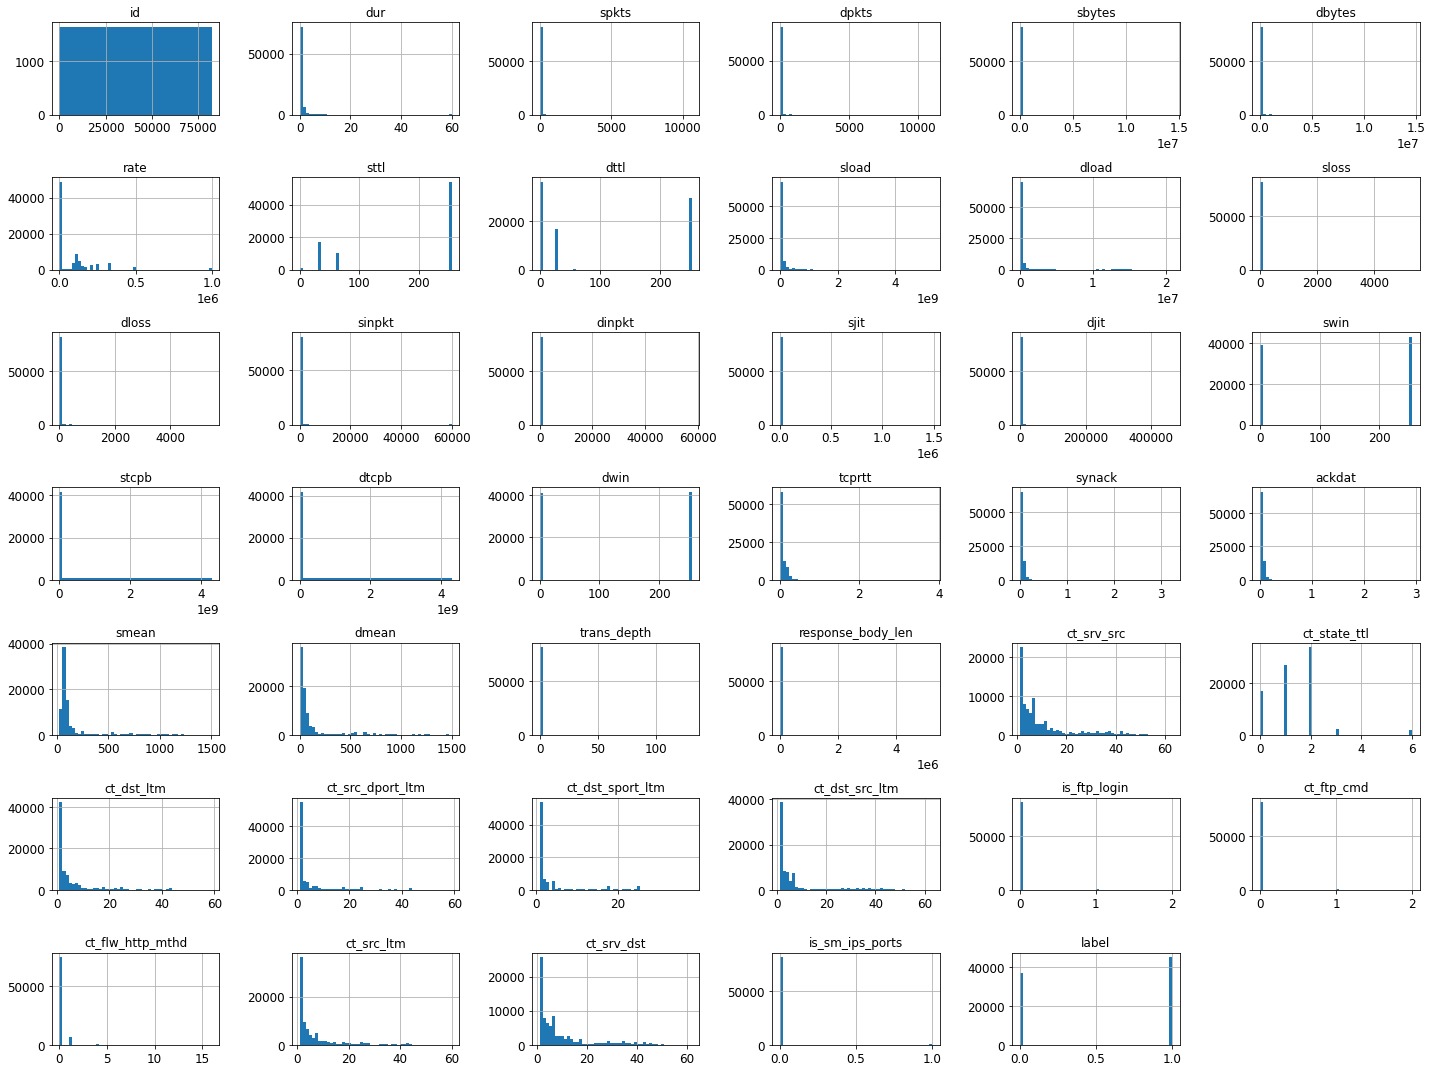

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
len(train_set)

82332

In [ ]:
len(test_set)

175341

**Discover and Visualize the Data to Gain Insights**

In [ ]:
train_copy = train_set.copy()

**Visualizing Geographical Data**

Saving figure bad_visualization_plot


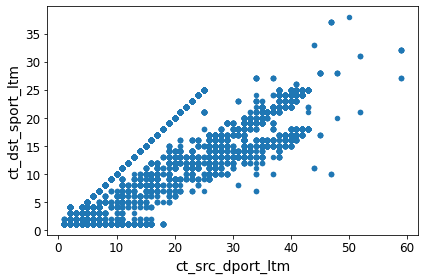

In [ ]:
train_copy.plot(kind="scatter", x="ct_src_dport_ltm", y="ct_dst_sport_ltm")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


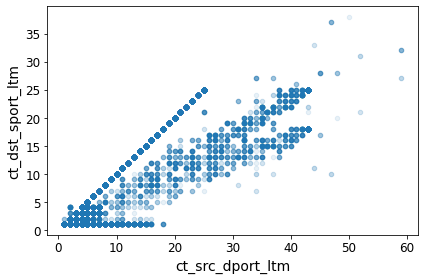

In [ ]:
train_copy.plot(kind="scatter", x="ct_src_dport_ltm", y="ct_dst_sport_ltm", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure record_scatterplot


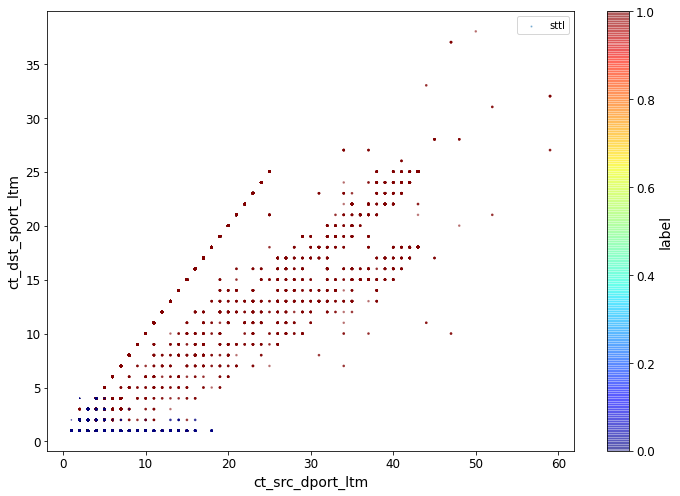

In [ ]:
train_set.plot(kind="scatter", x="ct_src_dport_ltm", y="ct_dst_sport_ltm", alpha=0.4,
               s=train_set["sttl"]/100, label="sttl", figsize=(10,7),
               c="label", cmap=plt.get_cmap("jet"), colorbar=True,
               sharex=False)
plt.legend()
save_fig("record_scatterplot")

**Looking for Correlations**

In [ ]:
corr_matrix = train_set.corr()

In [ ]:
corr_matrix["sttl"].sort_values(ascending=False)

sttl                 1.000000
ct_state_ttl         0.556059
label                0.504159
rate                 0.388155
ct_dst_src_ltm       0.335118
ct_dst_sport_ltm     0.315776
ct_srv_src           0.311509
ct_srv_dst           0.304131
ct_src_dport_ltm     0.287568
sload                0.252901
ct_src_ltm           0.236869
ct_dst_ltm           0.220689
id                   0.095939
sjit                 0.030062
smean                0.001120
dur                 -0.000986
dinpkt              -0.006154
ackdat              -0.013597
sbytes              -0.017866
tcprtt              -0.017990
synack              -0.018886
dttl                -0.033338
sloss               -0.038088
response_body_len   -0.054898
djit                -0.084072
is_ftp_login        -0.089618
ct_ftp_cmd          -0.089897
spkts               -0.092536
dbytes              -0.114537
trans_depth         -0.124303
dloss               -0.137737
dpkts               -0.163830
ct_flw_http_mthd    -0.174840
sinpkt    

In [ ]:
corr_matrix["label"].sort_values(ascending=False)

label                1.000000
sttl                 0.504159
ct_dst_sport_ltm     0.393668
ct_src_dport_ltm     0.341513
rate                 0.328629
ct_state_ttl         0.318517
ct_srv_dst           0.292931
ct_srv_src           0.290195
ct_dst_src_ltm       0.279989
ct_src_ltm           0.276494
ct_dst_ltm           0.257995
sload                0.124548
sbytes               0.020641
sloss                0.006360
dur                 -0.001145
is_ftp_login        -0.016206
response_body_len   -0.016414
ct_ftp_cmd          -0.017138
trans_depth         -0.025804
djit                -0.027131
sjit                -0.027397
spkts               -0.027731
dbytes              -0.032632
dinpkt              -0.037585
dloss               -0.044399
smean               -0.061146
dpkts               -0.061515
ct_flw_http_mthd    -0.075028
dttl                -0.098591
is_sm_ips_ports     -0.117407
ackdat              -0.120522
sinpkt              -0.120768
tcprtt              -0.148800
synack    

Saving figure scatter_matrix_plot


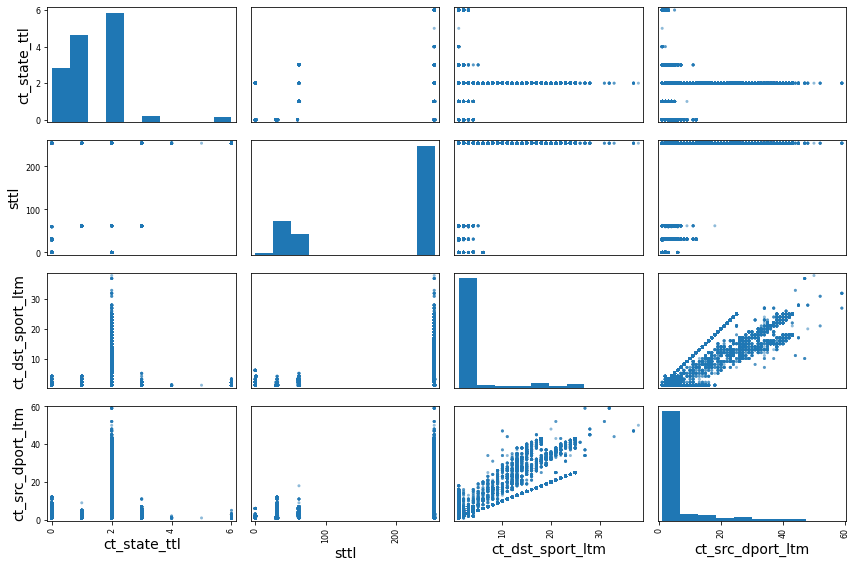

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["ct_state_ttl", "sttl", "ct_dst_sport_ltm","ct_src_dport_ltm"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure scatter_matrix_plot


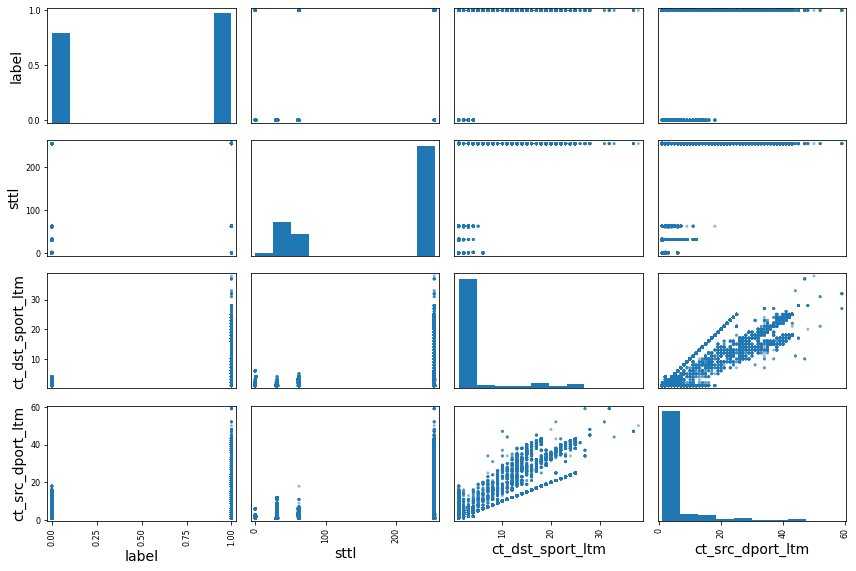

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["label", "sttl", "ct_dst_sport_ltm","ct_src_dport_ltm"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure dst_vs_src_scatterplot


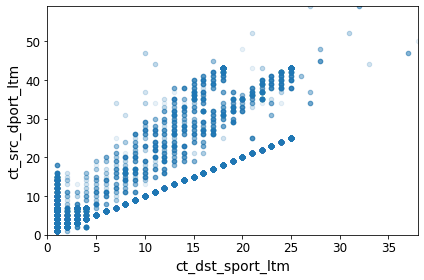

In [ ]:
train_set.plot(kind="scatter", x="ct_dst_sport_ltm", y="ct_src_dport_ltm",alpha=0.1)
plt.axis([0, 38, 0, 59])
save_fig("dst_vs_src_scatterplot")

**Data Cleaning**

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [ ]:
train_incomplete_rows = train_set[train_set.isnull().any(axis=1)].head()
train_incomplete_rows

Empty DataFrame
Columns: [id, dur, proto, service, state, spkts, dpkts, sbytes, dbytes, rate, sttl, dttl, sload, dload, sloss, dloss, sinpkt, dinpkt, sjit, djit, swin, stcpb, dtcpb, dwin, tcprtt, synack, ackdat, smean, dmean, trans_depth, response_body_len, ct_srv_src, ct_state_ttl, ct_dst_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, is_ftp_login, ct_ftp_cmd, ct_flw_http_mthd, ct_src_ltm, ct_srv_dst, is_sm_ips_ports, attack_cat, label]
Index: []

[0 rows x 45 columns]

In [ ]:
test_incomplete_rows = test_set[test_set.isnull().any(axis=1)].head()
test_incomplete_rows

Empty DataFrame
Columns: [id, dur, proto, service, state, spkts, dpkts, sbytes, dbytes, rate, sttl, dttl, sload, dload, sloss, dloss, sinpkt, dinpkt, sjit, djit, swin, stcpb, dtcpb, dwin, tcprtt, synack, ackdat, smean, dmean, trans_depth, response_body_len, ct_srv_src, ct_state_ttl, ct_dst_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, is_ftp_login, ct_ftp_cmd, ct_flw_http_mthd, ct_src_ltm, ct_srv_dst, is_sm_ips_ports, attack_cat, label]
Index: []

[0 rows x 45 columns]

In [ ]:
train = train_incomplete_rows.drop(["dload","sloss","dloss","sinpkt","dinpkt","sjit","djit","swin","stcpb","dtcpb","dwin","tcprtt","synack","ackdat","smean","dmean","trans_depth", "response_body_len", "ct_srv_src", "ct_state_ttl", "ct_dst_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "is_ftp_login","ct_ftp_cmd", "ct_flw_http_mthd", "ct_src_ltm","ct_srv_dst", "is_sm_ips_ports", "attack_cat", "label"] , axis=1)  

In [ ]:
test = test_incomplete_rows.drop(["sload","dload","sloss","dloss","sinpkt","dinpkt","sjit","djit","swin","stcpb","dtcpb","dwin","tcprtt","synack","ackdat","smean","dmean","trans_depth", "response_body_len", "ct_srv_src", "ct_state_ttl", "ct_dst_ltm", "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "is_ftp_login","ct_ftp_cmd", "ct_flw_http_mthd", "ct_src_ltm","ct_srv_dst", "is_sm_ips_ports", "attack_cat", "label"] , axis=1)

In [ ]:
train

Empty DataFrame
Columns: [id, dur, proto, service, state, spkts, dpkts, sbytes, dbytes, rate, sttl, dttl, sload]
Index: []

In [ ]:
test

Empty DataFrame
Columns: [id, dur, proto, service, state, spkts, dpkts, sbytes, dbytes, rate, sttl, dttl]
Index: []

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


**Remove the text attribute because median can only be calculated on numerical attributes:**

In [ ]:
train_num = train_set.drop(["proto","service","state","attack_cat"], axis=1)
test_num = test_set.drop(["proto","service","state","attack_cat"], axis=1)

In [ ]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

In [ ]:
imputer.fit(train_num)

SimpleImputer(strategy='median')

In [ ]:
test_input = imputer.fit(test_num)
test_input

SimpleImputer(strategy='median')

In [ ]:
test_input.statistics_

array([8.76710000e+04, 1.58200000e-03, 2.00000000e+00, 2.00000000e+00,
       4.30000000e+02, 1.64000000e+02, 3.22580652e+03, 2.54000000e+02,
       2.90000000e+01, 8.79674750e+05, 1.44702271e+03, 0.00000000e+00,
       0.00000000e+00, 2.79733000e-01, 6.00000000e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.30000000e+01, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
       5.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.00000000e+00, 4.00000000e+00, 0.00000000e+00,
       1.00000000e+00])

In [ ]:
imputer.statistics_

array([8.76710000e+04, 1.58200000e-03, 2.00000000e+00, 2.00000000e+00,
       4.30000000e+02, 1.64000000e+02, 3.22580652e+03, 2.54000000e+02,
       2.90000000e+01, 8.79674750e+05, 1.44702271e+03, 0.00000000e+00,
       0.00000000e+00, 2.79733000e-01, 6.00000000e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.30000000e+01, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
       5.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.00000000e+00, 4.00000000e+00, 0.00000000e+00,
       1.00000000e+00])

**Check that this is the same as manually computing the median of each attribute:**

In [ ]:
train_num.median().values

array([4.11665000e+04, 1.41380000e-02, 6.00000000e+00, 2.00000000e+00,
       5.34000000e+02, 1.78000000e+02, 2.65017667e+03, 2.54000000e+02,
       2.90000000e+01, 5.77003219e+05, 2.11295142e+03, 1.00000000e+00,
       0.00000000e+00, 5.57928500e-01, 1.00000000e-02, 1.76239185e+01,
       0.00000000e+00, 2.55000000e+02, 2.78888550e+07, 2.85697485e+07,
       2.55000000e+02, 5.51000000e-04, 4.41000000e-04, 8.00000000e-05,
       6.50000000e+01, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
       5.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.00000000e+00, 5.00000000e+00, 0.00000000e+00,
       1.00000000e+00])

In [ ]:
test_num.median().values

array([8.76710000e+04, 1.58200000e-03, 2.00000000e+00, 2.00000000e+00,
       4.30000000e+02, 1.64000000e+02, 3.22580652e+03, 2.54000000e+02,
       2.90000000e+01, 8.79674750e+05, 1.44702271e+03, 0.00000000e+00,
       0.00000000e+00, 2.79733000e-01, 6.00000000e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.30000000e+01, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
       5.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.00000000e+00, 4.00000000e+00, 0.00000000e+00,
       1.00000000e+00])

**Transform the training set:**

In [ ]:
X = imputer.transform(train_num)
Y = test_input.transform(test_num)

In [ ]:
train_tr = pd.DataFrame(X, columns=train_num.columns,
                          index=train_set.index)
train_tr.loc[train.index.values]

Empty DataFrame
Columns: [id, dur, spkts, dpkts, sbytes, dbytes, rate, sttl, dttl, sload, dload, sloss, dloss, sinpkt, dinpkt, sjit, djit, swin, stcpb, dtcpb, dwin, tcprtt, synack, ackdat, smean, dmean, trans_depth, response_body_len, ct_srv_src, ct_state_ttl, ct_dst_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, is_ftp_login, ct_ftp_cmd, ct_flw_http_mthd, ct_src_ltm, ct_srv_dst, is_sm_ips_ports, label]
Index: []

[0 rows x 41 columns]

In [ ]:
test_tr = pd.DataFrame(Y, columns=test_num.columns,
                          index=test_set.index)
test_tr.loc[test.index.values]

Empty DataFrame
Columns: [id, dur, spkts, dpkts, sbytes, dbytes, rate, sttl, dttl, sload, dload, sloss, dloss, sinpkt, dinpkt, sjit, djit, swin, stcpb, dtcpb, dwin, tcprtt, synack, ackdat, smean, dmean, trans_depth, response_body_len, ct_srv_src, ct_state_ttl, ct_dst_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, is_ftp_login, ct_ftp_cmd, ct_flw_http_mthd, ct_src_ltm, ct_srv_dst, is_sm_ips_ports, label]
Index: []

[0 rows x 41 columns]

In [ ]:
train_tr = pd.DataFrame(X, columns=train_num.columns,
                          index=train_num.index)

In [ ]:
test_tr = pd.DataFrame(Y, columns=test_num.columns,
                          index=test_num.index)

In [ ]:
train_tr.head()

id       dur  spkts  dpkts  sbytes  dbytes         rate   sttl  dttl  \
0  1.0  0.000011    2.0    0.0   496.0     0.0   90909.0902  254.0   0.0   
1  2.0  0.000008    2.0    0.0  1762.0     0.0  125000.0003  254.0   0.0   
2  3.0  0.000005    2.0    0.0  1068.0     0.0  200000.0051  254.0   0.0   
3  4.0  0.000006    2.0    0.0   900.0     0.0  166666.6608  254.0   0.0   
4  5.0  0.000010    2.0    0.0  2126.0     0.0  100000.0025  254.0   0.0   

         sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  180363632.0  ...               1.0               1.0             2.0   
1  881000000.0  ...               1.0               1.0             2.0   
2  854400000.0  ...               1.0               1.0             3.0   
3  600000000.0  ...               2.0               1.0             3.0   
4  850400000.0  ...               2.0               1.0             3.0   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0           0.0         0.0               0.0         1.0         2.0   
1           0.0         0.0               0.0         1.0         2.0   
2           0.0         0.0               0.0         1.0         3.0   
3           0.0         0.0               0.0         2.0         3.0   
4           0.0         0.0               0.0         2.0         3.0   

   is_sm_ips_ports  label  
0              0.0    0.0  
1              0.0    0.0  
2              0.0    0.0  
3              0.0    0.0  
4              0.0    0.0  

[5 rows x 41 columns]

In [ ]:
test_tr.head()

id       dur  spkts  dpkts  sbytes   dbytes       rate   sttl   dttl  \
0  1.0  0.121478    6.0    4.0   258.0    172.0  74.087490  252.0  254.0   
1  2.0  0.649902   14.0   38.0   734.0  42014.0  78.473372   62.0  252.0   
2  3.0  1.623129    8.0   16.0   364.0  13186.0  14.170161   62.0  252.0   
3  4.0  1.681642   12.0   12.0   628.0    770.0  13.677108   62.0  252.0   
4  5.0  0.449454   10.0    6.0   534.0    268.0  33.373826  254.0  252.0   

          sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  14158.942380  ...               1.0               1.0             1.0   
1   8395.112305  ...               1.0               1.0             2.0   
2   1572.271851  ...               1.0               1.0             3.0   
3   2740.178955  ...               1.0               1.0             3.0   
4   8561.499023  ...               2.0               1.0            40.0   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0           0.0         0.0               0.0         1.0         1.0   
1           0.0         0.0               0.0         1.0         6.0   
2           0.0         0.0               0.0         2.0         6.0   
3           1.0         1.0               0.0         2.0         1.0   
4           0.0         0.0               0.0         2.0        39.0   

   is_sm_ips_ports  label  
0              0.0    0.0  
1              0.0    0.0  
2              0.0    0.0  
3              0.0    0.0  
4              0.0    0.0  

[5 rows x 41 columns]

**Handling Text and Categorical Attributes**
<br>
Now let's preprocess the categorical input feature, "proto","service","state","attack_cat":

In [ ]:
train_cat = train_set[["proto","service","state","attack_cat"]]
train_cat.head(10)

proto service state attack_cat
0   udp       -   INT     Normal
1   udp       -   INT     Normal
2   udp       -   INT     Normal
3   udp       -   INT     Normal
4   udp       -   INT     Normal
5   udp       -   INT     Normal
6   udp       -   INT     Normal
7   udp       -   INT     Normal
8   arp       -   INT     Normal
9   arp       -   INT     Normal

In [ ]:
test_cat = test_set[["proto","service","state","attack_cat"]]
test_cat.head(10)

proto service state attack_cat
0   tcp       -   FIN     Normal
1   tcp       -   FIN     Normal
2   tcp       -   FIN     Normal
3   tcp     ftp   FIN     Normal
4   tcp       -   FIN     Normal
5   tcp       -   FIN     Normal
6   tcp       -   FIN     Normal
7   tcp       -   FIN     Normal
8   tcp       -   FIN     Normal
9   tcp       -   FIN     Normal

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
train_cat_encoded[:10]

array([[117.,   0.,   4.,   6.],
       [117.,   0.,   4.,   6.],
       [117.,   0.,   4.,   6.],
       [117.,   0.,   4.,   6.],
       [117.,   0.,   4.,   6.],
       [117.,   0.,   4.,   6.],
       [117.,   0.,   4.,   6.],
       [117.,   0.,   4.,   6.],
       [  6.,   0.,   4.,   6.],
       [  6.,   0.,   4.,   6.]])

In [ ]:
train_encoder = OrdinalEncoder()
test_cat_encoded = train_encoder.fit_transform(test_cat)
test_cat_encoded[:10]

array([[113.,   0.,   2.,   6.],
       [113.,   0.,   2.,   6.],
       [113.,   0.,   2.,   6.],
       [113.,   3.,   2.,   6.],
       [113.,   0.,   2.,   6.],
       [113.,   0.,   2.,   6.],
       [113.,   0.,   2.,   6.],
       [113.,   0.,   2.,   6.],
       [113.,   0.,   2.,   6.],
       [113.,   0.,   2.,   6.]])

In [ ]:
ordinal_encoder.categories_

[array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
        'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
        'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
        'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
        'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
        'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il', 'ip',
        'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
        'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
        'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
        'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
        'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
        'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
        'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rvd', 'sat-expak', 'sat-mon',
        'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp', 'sep', 'skip',
      

In [ ]:
train_encoder.categories_

[array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
        'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
        'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
        'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
        'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
        'icmp', 'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il',
        'ip', 'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
        'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
        'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
        'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
        'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
        'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
        'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rtp', 'rvd', 'sat-expak',
        'sat-mon', 'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp',
      

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot

<82332x161 sparse matrix of type '<class 'numpy.float64'>'
	with 329328 stored elements in Compressed Sparse Row format>

In [ ]:
test_cat_encoder = OneHotEncoder()
test_cat_1hot = test_cat_encoder.fit_transform(test_cat)
test_cat_1hot

<175341x165 sparse matrix of type '<class 'numpy.float64'>'
	with 701364 stored elements in Compressed Sparse Row format>

By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:


In [ ]:
train_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_cat_encoder = OneHotEncoder(sparse=False)
test_cat_1hot = test_cat_encoder.fit_transform(test_cat)
test_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
        'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
        'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
        'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
        'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
        'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il', 'ip',
        'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
        'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
        'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
        'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
        'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
        'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
        'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rvd', 'sat-expak', 'sat-mon',
        'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp', 'sep', 'skip',
      

**Transformation Pipelines**
<br>
Now let's build a pipeline for preprocessing the numerical attributes:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
num_pipe = Pipeline([
        ('test_input', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


train_num_tr = num_pipeline.fit_transform(train_num)
test_num_tr = num_pipe.fit_transform(test_num)
data_train = pd.DataFrame(train_num_tr)
data_test = pd.DataFrame(test_num_tr)
data_train.head()

0         1         2         3         4         5         6   \
0 -1.732030 -0.213727 -0.124455 -0.151816 -0.043684 -0.087369  0.057181   
1 -1.731988 -0.213728 -0.124455 -0.151816 -0.036308 -0.087369  0.286565   
2 -1.731946 -0.213729 -0.124455 -0.151816 -0.040351 -0.087369  0.791209   
3 -1.731904 -0.213729 -0.124455 -0.151816 -0.041330 -0.087369  0.566923   
4 -1.731861 -0.213728 -0.124455 -0.151816 -0.034187 -0.087369  0.118350   

        7         8         9   ...        31        32        33        34  \
0  0.71944 -0.820395  0.643913  ... -0.468312 -0.450186 -0.477994 -0.090857   
1  0.71944 -0.820395  4.539351  ... -0.468312 -0.450186 -0.477994 -0.090857   
2  0.71944 -0.820395  4.391459  ... -0.468312 -0.450186 -0.390391 -0.090857   
3  0.71944 -0.820395  2.977031  ... -0.349115 -0.450186 -0.390391 -0.090857   
4  0.71944 -0.820395  4.369219  ... -0.349115 -0.450186 -0.390391 -0.090857   

         35        36        37        38       39        40  
0 -0.090617 -0.203143 -0.640033 -0.644190 -0.10607 -1.106883  
1 -0.090617 -0.203143 -0.640033 -0.644190 -0.10607 -1.106883  
2 -0.090617 -0.203143 -0.640033 -0.554273 -0.10607 -1.106883  
3 -0.090617 -0.203143 -0.522990 -0.554273 -0.10607 -1.106883  
4 -0.090617 -0.203143 -0.522990 -0.554273 -0.10607 -1.106883  

[5 rows x 41 columns]

In [ ]:
data_test.head()

0         1         2         3         4         5         6   \
0 -1.732041 -0.191029 -0.104456 -0.135769 -0.049134 -0.102726 -0.576371   
1 -1.732021 -0.109485 -0.046014  0.172599 -0.046410  0.188544 -0.576345   
2 -1.732001  0.040699 -0.089845 -0.026933 -0.048527 -0.012133 -0.576734   
3 -1.731982  0.049729 -0.060624 -0.063212 -0.047016 -0.098563 -0.576737   
4 -1.731962 -0.140417 -0.075235 -0.117630 -0.047554 -0.102057 -0.576617   

         7         8         9   ...        31        32        33        34  \
0  0.703839  1.578100 -0.389897  ... -0.544736 -0.554373 -0.705529 -0.118590   
1 -1.141901  1.560002 -0.389928  ... -0.544736 -0.554373 -0.614256 -0.118590   
2 -1.141901  1.560002 -0.389964  ... -0.544736 -0.554373 -0.522983 -0.118590   
3 -1.141901  1.560002 -0.389958  ... -0.544736 -0.554373 -0.522983  7.814915   
4  0.723268  1.560002 -0.389927  ... -0.420468 -0.554373  2.854115 -0.118590   

         35        36        37        38        39        40  
0 -0.118590 -0.189768 -0.715714 -0.753074 -0.126508 -1.459825  
1 -0.118590 -0.189768 -0.715714 -0.288257 -0.126508 -1.459825  
2 -0.118590 -0.189768 -0.595543 -0.288257 -0.126508 -1.459825  
3  7.814915 -0.189768 -0.595543 -0.753074 -0.126508 -1.459825  
4 -0.118590 -0.189768 -0.595543  2.779535 -0.126508 -1.459825  

[5 rows x 41 columns]

In [ ]:
train_test = pd.DataFrame(train_num_tr)
train_test.head()

0         1         2         3         4         5         6   \
0 -1.732030 -0.213727 -0.124455 -0.151816 -0.043684 -0.087369  0.057181   
1 -1.731988 -0.213728 -0.124455 -0.151816 -0.036308 -0.087369  0.286565   
2 -1.731946 -0.213729 -0.124455 -0.151816 -0.040351 -0.087369  0.791209   
3 -1.731904 -0.213729 -0.124455 -0.151816 -0.041330 -0.087369  0.566923   
4 -1.731861 -0.213728 -0.124455 -0.151816 -0.034187 -0.087369  0.118350   

        7         8         9   ...        31        32        33        34  \
0  0.71944 -0.820395  0.643913  ... -0.468312 -0.450186 -0.477994 -0.090857   
1  0.71944 -0.820395  4.539351  ... -0.468312 -0.450186 -0.477994 -0.090857   
2  0.71944 -0.820395  4.391459  ... -0.468312 -0.450186 -0.390391 -0.090857   
3  0.71944 -0.820395  2.977031  ... -0.349115 -0.450186 -0.390391 -0.090857   
4  0.71944 -0.820395  4.369219  ... -0.349115 -0.450186 -0.390391 -0.090857   

         35        36        37        38       39        40  
0 -0.090617 -0.203143 -0.640033 -0.644190 -0.10607 -1.106883  
1 -0.090617 -0.203143 -0.640033 -0.644190 -0.10607 -1.106883  
2 -0.090617 -0.203143 -0.640033 -0.554273 -0.10607 -1.106883  
3 -0.090617 -0.203143 -0.522990 -0.554273 -0.10607 -1.106883  
4 -0.090617 -0.203143 -0.522990 -0.554273 -0.10607 -1.106883  

[5 rows x 41 columns]

In [ ]:
test_test = pd.DataFrame(test_num_tr)
test_test.head()


0         1         2         3         4         5         6   \
0 -1.732041 -0.191029 -0.104456 -0.135769 -0.049134 -0.102726 -0.576371   
1 -1.732021 -0.109485 -0.046014  0.172599 -0.046410  0.188544 -0.576345   
2 -1.732001  0.040699 -0.089845 -0.026933 -0.048527 -0.012133 -0.576734   
3 -1.731982  0.049729 -0.060624 -0.063212 -0.047016 -0.098563 -0.576737   
4 -1.731962 -0.140417 -0.075235 -0.117630 -0.047554 -0.102057 -0.576617   

         7         8         9   ...        31        32        33        34  \
0  0.703839  1.578100 -0.389897  ... -0.544736 -0.554373 -0.705529 -0.118590   
1 -1.141901  1.560002 -0.389928  ... -0.544736 -0.554373 -0.614256 -0.118590   
2 -1.141901  1.560002 -0.389964  ... -0.544736 -0.554373 -0.522983 -0.118590   
3 -1.141901  1.560002 -0.389958  ... -0.544736 -0.554373 -0.522983  7.814915   
4  0.723268  1.560002 -0.389927  ... -0.420468 -0.554373  2.854115 -0.118590   

         35        36        37        38        39        40  
0 -0.118590 -0.189768 -0.715714 -0.753074 -0.126508 -1.459825  
1 -0.118590 -0.189768 -0.715714 -0.288257 -0.126508 -1.459825  
2 -0.118590 -0.189768 -0.595543 -0.288257 -0.126508 -1.459825  
3  7.814915 -0.189768 -0.595543 -0.753074 -0.126508 -1.459825  
4 -0.118590 -0.189768 -0.595543  2.779535 -0.126508 -1.459825  

[5 rows x 41 columns]

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs = ["proto","service","state","attack_cat"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_set)

In [ ]:
print(len(num_attribs))


41


In [ ]:
from sklearn.compose import ColumnTransformer
num_att = list(test_num)
cat_att = ["proto","service","state","attack_cat"]
full_pipe = ColumnTransformer([
        ("number", num_pipe, num_att),
        ("category", OneHotEncoder(), cat_att),
    ])

test_prepared = full_pipe.fit_transform(test_set)

In [ ]:
test_prepared

<175341x206 sparse matrix of type '<class 'numpy.float64'>'
	with 7890344 stored elements in Compressed Sparse Row format>

In [ ]:
print(len(num_att))

41


In [ ]:
train_prepared.toarray()

array([[-1.73202977, -0.21372745, -0.1244551 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.7319877 , -0.21372808, -0.1244551 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.73194562, -0.21372872, -0.1244551 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.73194562, -0.21372978, -0.1319225 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.7319877 , -0.21372978, -0.1319225 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73202977, -0.21372787, -0.1244551 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
train_prepared.shape

(82332, 202)

In [ ]:
test_prepared.shape

(175341, 206)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [ ]:
num_attribs = list(train_num)
num_att =list(test_num)
cat_attribs = ["proto","service","state","attack_cat"]
cat_att = ["proto","service","state","attack_cat"]
old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_num_pipe = Pipeline([
        ('selector', OldDataFrameSelector(num_att)),
        ('test_index', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])
old_cat_pipe = Pipeline([
        ('selector', OldDataFrameSelector(cat_att)),
        ('test_cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [ ]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

old_full_pipe = FeatureUnion(transformer_list=[
        ("num_pipe", old_num_pipe),
        ("cat_pipe", old_cat_pipe),
    ])

In [ ]:
old_train_prepared = old_full_pipeline.fit_transform(train_set)
old_train_prepared.shape

(82332, 202)

In [ ]:
old_test_prepared = old_full_pipe.fit_transform(test_set)
old_test_prepared.shape

(175341, 206)

In [ ]:
np.allclose(train_prepared.toarray(), old_train_prepared)

True

In [ ]:
np.allclose(test_prepared.toarray(), old_test_prepared)

True

In [ ]:
train_prep = pd.DataFrame(train_prepared.toarray())
train_prep.head()

0         1         2         3         4         5         6    \
0 -1.732030 -0.213727 -0.124455 -0.151816 -0.043684 -0.087369  0.057181   
1 -1.731988 -0.213728 -0.124455 -0.151816 -0.036308 -0.087369  0.286565   
2 -1.731946 -0.213729 -0.124455 -0.151816 -0.040351 -0.087369  0.791209   
3 -1.731904 -0.213729 -0.124455 -0.151816 -0.041330 -0.087369  0.566923   
4 -1.731861 -0.213728 -0.124455 -0.151816 -0.034187 -0.087369  0.118350   

       7         8         9    ...  192  193  194  195  196  197  198  199  \
0  0.71944 -0.820395  0.643913  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.71944 -0.820395  4.539351  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.71944 -0.820395  4.391459  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
3  0.71944 -0.820395  2.977031  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  0.71944 -0.820395  4.369219  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

   200  201  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 202 columns]

In [ ]:
test_prep = pd.DataFrame(test_prepared.toarray())
test_prep = test_prep.drop(test_prep.columns[-4:], axis=1)
test_prep.head()

0         1         2         3         4         5         6    \
0 -1.732041 -0.191029 -0.104456 -0.135769 -0.049134 -0.102726 -0.576371   
1 -1.732021 -0.109485 -0.046014  0.172599 -0.046410  0.188544 -0.576345   
2 -1.732001  0.040699 -0.089845 -0.026933 -0.048527 -0.012133 -0.576734   
3 -1.731982  0.049729 -0.060624 -0.063212 -0.047016 -0.098563 -0.576737   
4 -1.731962 -0.140417 -0.075235 -0.117630 -0.047554 -0.102057 -0.576617   

        7         8         9    ...  192  193  194  195  196  197  198  199  \
0  0.703839  1.578100 -0.389897  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 -1.141901  1.560002 -0.389928  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -1.141901  1.560002 -0.389964  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -1.141901  1.560002 -0.389958  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.723268  1.560002 -0.389927  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   200  201  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 202 columns]

# **Select & Train a Model**

Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
import copy

target_column = 201
dt_train_prep = copy.deepcopy(train_prep)

X = dt_train_prep.drop([target_column], axis = 1)
y = dt_train_prep[target_column]
dt_train_prep.shape

(82332, 202)

In [ ]:
from sklearn.model_selection import train_test_split
import copy

target_column = 201
dt_train_prep = copy.deepcopy(train_prep)

X = dt_train_prep.drop([target_column], axis = 1)
y = dt_train_prep[target_column]
dt_train_prep.shape

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=10)

from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(y)
model.fit(X, encoded)

dt_test_set = copy.deepcopy(test_prep)

from sklearn.metrics import mean_squared_error

dt_predictions = model.predict(X)

tree_mse = mean_squared_error(encoded, dt_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, encoded, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.03973436 0.01908777 0.         0.011021   0.01558605 0.03655252
 0.02699582 0.02699582 0.         0.01908893]
Mean: 0.019506226768022123
Standard deviation: 0.012886595686492603


*Random Forest Tree*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X, encoded)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

attack_predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(encoded, attack_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Forest MSE: ", forest_rmse)

Forest MSE:  0.00619966491956627


In [ ]:
#def display_scores(scores):
#    print("Scores:", scores)
#    print("Mean:", scores.mean())
#    print("Standard deviation:", scores.std())

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X, encoded, scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.01975325 0.01940796 0.02958606]
Mean: 0.02291575816320666
Standard deviation: 0.004718725065105802


Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Convert the categorical target variable to numerical labels
lrle = LabelEncoder()
train_labels = lrle.fit_transform(train_set["attack_cat"])
test_labels = lrle.transform(test_set["attack_cat"])

# Create the linear regression model object
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(train_prep, train_labels)

# Predict the targets using the test data
lin_reg_predictions = lin_reg.predict(test_prep)

In [ ]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

lin_reg_mse = mean_squared_error(test_labels, lin_reg_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_mae = mean_absolute_error(test_labels, lin_reg_predictions)
lin_reg_r2 = r2_score(test_labels, lin_reg_predictions)

print("Linear Regression MSE: ", lin_reg_mse)
print("Linear Regression RMSE: ", lin_reg_rmse)
print("Linear Regression MAE: ", lin_reg_mae)
print("Linear Regression R^2: ", lin_reg_r2)

Linear Regression MSE:  10.394555862864795
Linear Regression RMSE:  3.2240589111963813
Linear Regression MAE:  2.6626755620542695
Linear Regression R^2:  -3.226535742523497


In [ ]:
accuracy = 100 - lin_reg_mae

print("\nLinear Regression Accuracy: ", accuracy, "%")


Linear Regression Accuracy:  97.33732443794572 %


Subtracting the MAE from 100 in order to obtain an accuracy score that is expressed as a percentage. However, this calculation is not a standard way of calculating accuracy, instead it is better to use common metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared.

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, train_prep, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.70341799e-14 6.07584503e-15 7.55760648e-04 1.88018439e-14
 4.44843731e-15 3.23011155e-05 4.66595060e-15 4.00624923e-15
 4.37537862e-15 6.06513394e-15]
Mean: 7.880617639228074e-05
Standard deviation: 0.00022585689835906772


**Fine-Tune Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

forest_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

decision_grid = {'max_leaf_nodes': list(range(13,15)), 'min_samples_split': [2, 3, 4]}


model = DecisionTreeRegressor(random_state=10)
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, forest_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)


grid_search.fit(X, encoded)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

# **Evaluate**

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.16634023e-02, 4.13891150e-02, 1.64842567e-02, 2.47005370e-02,
       1.00777823e-01, 1.37548674e-02, 4.87656128e-02, 1.81695944e-02,
       1.48065604e-04, 5.93170748e-02, 4.12088295e-02, 4.99199191e-03,
       9.99214112e-03, 4.36012461e-02, 3.58274600e-02, 2.93419194e-02,
       3.74845348e-02, 5.58397002e-05, 3.20697956e-02, 3.31263016e-02,
       3.46600609e-05, 3.47084730e-02, 3.32129932e-02, 3.16485715e-02,
       8.07336340e-02, 7.71167341e-03, 3.62666873e-03, 7.31435419e-03,
       1.71775474e-02, 4.31702566e-04, 4.40033898e-03, 5.15417776e-03,
       1.27521430e-04, 2.61556036e-03, 7.08072512e-08, 1.86102604e-07,
       4.18988654e-03, 2.09735230e-02, 1.03879711e-02, 2.49762730e-06,
       5.46085692e-03, 0.00000000e+00, 3.81973866e-08, 0.00000000e+00,
       3.27344029e-11, 0.00000000e+00, 3.68742123e-08, 2.05013697e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipe.named_transformers_["category"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.10077782338971122, 'sbytes'),
 (0.08073363401933746, 'smean'),
 (0.06166340227220653, 'id'),
 (0.05931707476329208, 'sload'),
 (0.048765612750044714, 'rate'),
 (0.04360124606749603, 'sinpkt'),
 (0.04138911500488401, 'dur'),
 (0.041208829543477515, 'dload'),
 (0.03748453482008814, 'djit'),
 (0.03582746001913583, 'dinpkt'),
 (0.034708472977444456, 'tcprtt'),
 (0.03321299317999079, 'synack'),
 (0.03312630155904848, 'dtcpb'),
 (0.03206979558430426, 'stcpb'),
 (0.03164857151480072, 'ackdat'),
 (0.029341919355260575, 'sjit'),
 (0.02470053699301262, 'dpkts'),
 (0.020973522966620802, 'ct_src_ltm'),
 (0.018169594366175507, 'sttl'),
 (0.017177547407490976, 'ct_srv_src'),
 (0.01648425671746314, 'spkts'),
 (0.013754867443049604, 'dbytes'),
 (0.010387971129632804, 'ct_srv_dst'),
 (0.009992141115587725, 'dloss'),
 (0.007711673410192464, 'dmean'),
 (0.007314354191927958, 'response_body_len'),
 (0.005460856922815545, 'label'),
 (0.005154177759485579, 'ct_src_dport_ltm'),
 (0.004991991907624586, 's

In [ ]:
test_set.head()

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

In [ ]:
test_set.shape

(175341, 45)

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("label", axis=1)
y_test = test_set["label"].copy()

X_test_prepared = full_pipe.transform(test_set)
X_test_prepared = pd.DataFrame(X_test_prepared.toarray())
X_test_prepared = X_test_prepared.drop(X_test_prepared.columns[-5:], axis=1)
X_test_prepared.shape
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

0.8107112579095723

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.80940401, 0.8120164 ])

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.809404014357402, 0.8120163969679213)